# 2.2

In [2]:
import numpy as np

In [3]:
class Perceptron(object):
    """ パーセプトロンの分類器
    
    パラメータ
    --------------------
    eta :float 学習率(0.0~1.0)
    n_iter :int トレーニングデータのトレーニング回数
    random_state:int 重みを初期化するための乱数シード
    
    属性
    --------------------
    w_ :１次元配列　適合後の重み
    errors_ :リスト　各エポックでの誤分類（更新）の数
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングに適合させる
    
        パラメータ
        --------------------
        X:配列のようなデータ構造、shape = [n_sample,n_features]
        トレーニングデータ、n_sampleはサンプルの個数、n_featuresは特徴量の個数
        y:配列のようなデータ構造、shape = [n_sample]
        目的変数
    
        戻り値
        --------------------
        self:object
    
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): #トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): #各サンプルで重みを更新
                #重み w1,...,wmの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                #重みの更新が0でない場合は誤分類としてカウントする
                errors += int(update != 0.0)
            
            #反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# memo
fitメソッドを使用することで、self.w_に格納されている重みをゼロベクトルに初期化する
（m+1)次元の実数値ベクトルとして各要素を0で初期化する  
ｍ＋１の理由としては、ベクトルの最初の要素sefl.w_[0]がバイアスユニットであるため。 
  
$\Delta w_0 = \eta (y^i - \hat{y}^i)$  
$\Delta w_j = \eta (y^i - \hat{y}^i) x_j^i$  

# 乱数の生成について
`rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])`  
    
np.randome.normal()は平均loc、標準偏差scaleの正規分布に従う乱数を返す。  
sizeをタプル(d0,d1,...,dn)として１次元の場合は、整数として渡す。  
  
## その他の分布の乱数生成
### 一様分布
`numpy.random.rand()`:0.0〜1.0  
`numpy.random.random_sample()`:0.0〜1.0    
`numpy.random.randint()`:任意の整数  
### 正規分布
`numpy.random.randn()`:平均0,分散1  
`numpy.random.normal()`:任意の平均、分散  
### 二項分布
`numpy.random.binomial()`  
### ベータ分布
`numpy.random.beta()`  
### ガンマ分布
`numpy.random.gamma()`  
### カイ二乗分布
`numpy.random.chisquare()`  


# 2.3

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1~100行目の目的変数を抽出（花の品種名）
# ilocは行・列番号を指定し,valuesで指定した値を取得する
y = df.iloc[0:100, 4].values

# iris-setosa:-1, iris-virginica:1として変換
y = np.where(y == 'Iris-setosa', -1, 1)

# 1~100行目の1,3列目の抽出（がく片の長さ、花びらの長さ）
X = df.iloc[0:100, [0, 2]].values

#　setosaのプロット
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# versicolorのプロット
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# ラベルと凡例の設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='uppper left')
# 図の表示
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Unrecognized location 'uppper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 640x480 with 1 Axes>

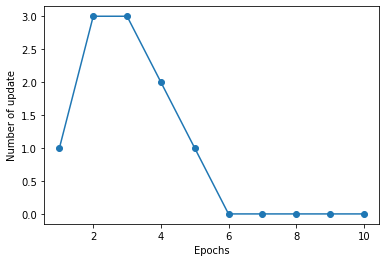

In [6]:
# パーセプトロンのインスタンスを生成
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X,y)
# エポックと誤分類誤差の関係を折れ線グラフにプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

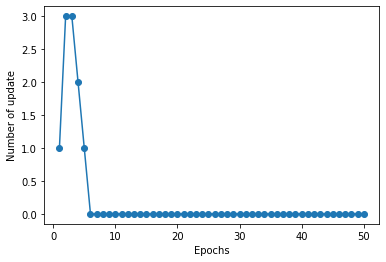

In [7]:
# パーセプトロンのインスタンスを生成
ppn = Perceptron(eta = 0.1, n_iter=50)
ppn.fit(X,y)
# エポックと誤分類誤差の関係を折れ線グラフにプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y = X[y == cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')

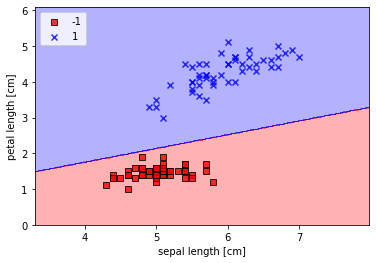

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# 2.5

In [10]:
class AdalineGD(object):
    """ADAptive Linear NEuron 分類器
    
    パラメータ
    --------------------------------
    eta : float 学習率(0.0〜1.0)
    n_iter : int トレーニングデータのトレーニング回数
    randome_state : int 重みを初期化するための乱数シード
    
    属性
    --------------------------------
    w_ : １次元配列　適合語の重み
    cost_ : リスト　各エポックでの誤差平方和のコスト関数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        -------------
        X : {配列のようなデータ構造}, shape = {n_sample, n_features}
           トレーニングデータ　n_sampleはサンプルの個数、n_featuresは特徴量の個数
           
        y : 配列のようなデータ構造、shape = {n_sample}
           目的変数
           
        戻り値
        -------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """挿入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self,X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

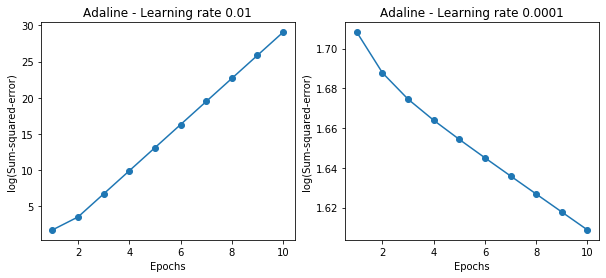

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)

ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

## 学習率の違い
左のグラフ：学習率が大きすぎると試行回数を増えていくごとに残差平方和が増えていく。  
右のグラフ：学習率が低すぎるため、残差平方和を大局的最小値にするには相当な試行回数が必要となる

# 3.1

In [12]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

print('Classs labels:', np.unique(y))


Classs labels: [0 1 2]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## memo
train_test_splitモジュールは、データをtrain,testに分割する機能を持つ  
分割する際には内部的にシャッフルしてから分割を行う。理由としては、元々の配列を単純に分割してしまうと分割した後の配列にカテゴリごとに偏りが出るためである  
random_stateパラメータを用いることで固定の乱数シードにより再現性のある分割となる  
stratifyで層化抽出を行うようにしている。この場合は、irisのカテゴリごとに層化抽出するようにしている。

In [14]:
print('Labeles counts in y:', np.bincount(y)) # yカテゴリごとに出現回数を数える機能＝np.bincount

Labeles counts in y: [50 50 50]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.linear_model import Perceptron
#エポック数40、学習率0.1でパーセプトロンのインスタンスを作成
ppn = Perceptron(eta0 = 0.1,random_state=0,shuffle=True)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

Accuracy : 0.93


In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,test_idx=None,
                          resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y = X[y == cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
        
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],
                   c='',
                   edgecolor = 'black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

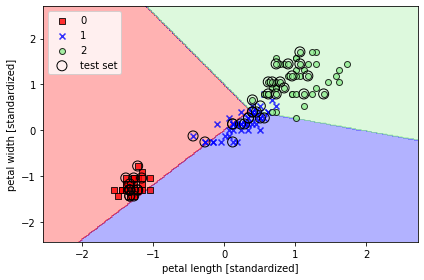

In [30]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,y_combined, classifier=ppn,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()